#GW170817 is the first gravitational wave signal of a binary neutron star inspiral recorded by the advanced LIGO and Virgo detectors. The waves produced depend on the masses of the two neutron stars and how much they defom due to tides from the other star. After the stars collide, the system may have also produced higher-frequency ‘post-merger’ waves that were too weak for the detectors to measure.  This code is meant to generate analytical waveforms structured with numerical simulations to visualize the post-merger range of GW170817.  It integrates gravitational-wave specific and Bayesian inference python packages to produce data with posterior samples inferred from GW170817. 

Originally used "!pip install pycbc lalsuite ligo-common" and "!pip install "gwpy" but something about installing both pycbc and gwpy causes colab to give errors in compatibilities, as well as, "missing" packages that asks you to restart runtime so i separated gwpy and pcybc into different cells


installing an older version of gwpy or else a compatibility error happens

In [ ]:
! pip install -q 'lalsuite==6.66' 'bilby==0.6.1' 'gwpy==1.0.1'

     |████████████████████████████████| 28.5 MB 64 kB/s 
     |████████████████████████████████| 1.5 MB 70.1 MB/s 
     |████████████████████████████████| 1.4 MB 49.9 MB/s 
     |████████████████████████████████| 52 kB 966 kB/s 
     |████████████████████████████████| 1.6 MB 53.7 MB/s 
     |████████████████████████████████| 87 kB 6.3 MB/s 
     |████████████████████████████████| 45 kB 3.1 MB/s 
     |████████████████████████████████| 54 kB 2.2 MB/s 
     |████████████████████████████████| 3.2 MB 41.6 MB/s 


In [ ]:
#clone github repo of bajes

! git clone https://github.com/matteobreschi/bajes.git

In [ ]:
#installs bajes repo to your content files on google colab, if using linux itll 
#have its own directory

%cd bajes
! ls
! python setup.py install

In [ ]:
#importing packages

from gwpy.timeseries import TimeSeries
import h5py
import numpy as np
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import math
from bajes.obs.gw import Series

#import drive so csv file wont just save during runtime
from google.colab import drive 
drive.mount('/content/drive/', force_remount = True)

In [ ]:
#time of GW170817
time_of_event = 1187008882.4 

post_trigger_duration =4
duration = 8
analysis_start = time_of_event + post_trigger_duration - duration

# Use gwpy to fetch the open data
H1_analysis_data = TimeSeries.fetch_open_data(
    "H1", analysis_start, analysis_start + duration, sample_rate=4096*4, 
    cache=True)

t = H1_analysis_data.times
strain = H1_analysis_data.value

# set the data properties coherently
seglen = 8           # duration of the segment [s]
srate  = 4096*4        # sampling rate [Hz]
t_gps  = 0 # central value of time
f_max  = 1024*4 
f_min  = 20 

series = Series('time', strain, seglen=seglen, srate=srate, t_gps=t_gps, 
                f_min=f_min, f_max=f_max)

from bajes.obs.gw import Waveform

wave  = Waveform(series.freqs, srate, seglen, 'NRPM') #NRPM for postmergers

In [ ]:
#assigning variables to data from GW170817 with source file 
#downloaded from https://www.gw-openscience.org/eventapi/html/GWTC-1-confident/GW170817/v3/

fn = "/content/drive/MyDrive/Colab_Notebooks/GW170817/GW170817_GWTC-1.hdf5"
data = h5py.File(fn,'r')

#defining samples

posterior_samples = data['IMRPhenomPv2NRT_highSpin_posterior']

#using pandas to set pnames

pnames = posterior_samples.dtype.names

#reading in mass 1 samples

ind = pnames.index('m1_detector_frame_Msun')

m1_samples = np.array([samp[ind] for samp in posterior_samples[()]])

#reading in mass 2 samples

ind = pnames.index('m2_detector_frame_Msun')

m2_samples = np.array([samp[ind] for samp in posterior_samples[()]])

#Defining lambda1 parameter

ind = pnames.index('lambda1')

lambda1_samples = np.array([samp[ind] for samp in posterior_samples[()]])


#defining lambda2 parameter
ind = pnames.index('lambda2')

lambda2_samples = np.array([samp[ind] for samp in posterior_samples[()]])



In [ ]:
#if you get an error while on google colab, run this cell again
!pip install pycbc
import pylab

from pycbc import waveform
from pycbc.types import TimeSeries as PTimeSeries, FrequencySeries

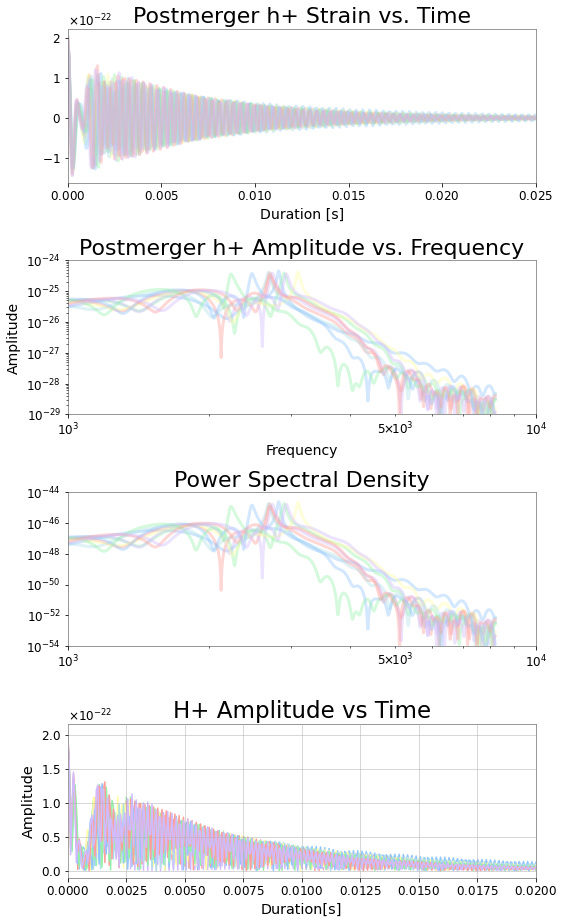

In [22]:
#GW170817 has array shape ~4000, chooses where in the array to start taking data
arr_index = 2000


#declaration of variables for easy adjustment
deltaT= 1./srate
c = "white"
transparency = 0.4
lwidth= 3
iterations= 10


#make 4 subplots so all simulations could be grouped together
#formatting all 4 subplots
plt.style.use('seaborn-pastel')
fig, (f1, f2, f3, f4) = plt.subplots(4, figsize=(8, 13))

#make simulations
for num in range(iterations):
#get values from the GW170817 data
  m1 = m1_samples[arr_index]
  m2= m2_samples[arr_index]
  lambda1= lambda1_samples[arr_index]
  lambda2= lambda2_samples[arr_index]
#NRPM approx is fickle and does not work if lambda values are lower than 350
#experimenting have found that sometimes it would work if a lambda1 = ~200 and 
#lambda2 = >1000 however, for ease of use, I just set the values for both lambda
#values to be 350 or up
  while lambda1 <= 350.0 or lambda2 <=350.0:
    arr_index = arr_index + 1
    m1 = m1_samples[arr_index]
    m2= m2_samples[arr_index]
    lambda1= lambda1_samples[arr_index]
    lambda2= lambda2_samples[arr_index]
    
    
  #calculate chirp mass and mass ratio based on values received from previous data
  chirp_mass = (math.pow((m1 * m2), (3/5))) / (math.pow((m1 + m2), (1/5)))
  q = m1 / m2

#parameters for new waveform
  params = {'mchirp'       : chirp_mass,    # chirp mass [solar masses] 
              'q'          : q,      # mass ratio 
              's1x'        : 0.,      # primary spin parameter, x component
              's1y'        : 0.,      # primary spin parameter, y component
              's1z'        : 0.,      # primary spin parameter, z component
              's2x'        : 0.,      # secondary spin parameter, x component
              's2y'        : 0.,      # secondary spin parameter, y component
              's2z'        : 0.,      # secondary spin parameter, z component
              'lambda1'    : lambda1,    # primary tidal parameter 
              'lambda2'    : lambda2,    # secondary tidal parameter
              'distance'   : 100.8114416513031,    # distance [Mpc]   
              'iota'       : np.pi,   # inclination [rad]   
              'ra'         : 0.,     # right ascension [rad]
              'dec'        : 0.,   # declination [rad]
              'psi'        : 0.,      # polarization angle [rad]
              'time_shift' : 0.419,   # time shift from GPS time [s]
              'phi_ref'    : 0.,      # phase shift [rad]
              'f_min'      : 20.,     # minimum frequency [Hz]
              'srate'      : srate,   # sampling rate [Hz]
              'seglen'     : seglen,  # segment duration [s] 
              'tukey'      : 0.1,     # parameter for tukey window
              't_gps'      : t_gps,   # GPS trigger time
              'lmax'       : 0., 
              'eccentricity' : 0.
             }  

  #calculates hp and hc
  hp, hc = wave.compute_hphc(params)
  
  #makes a plot of h+ amplitude vs time
 
  f1.plot(series.times, hp, alpha= transparency, linewidth=3, label= None)
  
  #uses the pcybc way to get amp and freq by turning hp to a time series 
  #then a frequency series
  hp_ts = PTimeSeries(hp, delta_t=deltaT)
  hp_fs = hp_ts.to_frequencyseries(delta_f=0.125) #HP Frequency Series

  #makes plot of h+ amplitude vs frequency

  f2.loglog(hp_fs.sample_frequencies, np.abs(hp_fs), 
    lw=lwidth, alpha= transparency, label= None)
  
  #makes power spectral density plot

  f3.loglog(hp_fs.sample_frequencies, 4* np.abs(hp_fs) *  np.abs(hp_fs) * hp_fs.sample_frequencies,  
     lw=lwidth, alpha= transparency, label=None)
  
  #makes amplitude vs time plot

  f4.plot(series.times, np.abs(hp))

  #iterates arr_index for next simulation
  arr_index = arr_index + 1
  
 
#formating our waveform graphs individually
f1.set_title('Postmerger h+ Strain vs. Time', fontsize=22, loc='center')
f1.set_xlabel('Duration [s]', fontsize=14)
f1.set_xlim(0.00, t_gps+0.025)
f1.set_facecolor(c)
f1.grid(False)

f2.set_title('Postmerger h+ Amplitude vs. Frequency', fontsize=22)
f2.set_ylabel("Amplitude", fontsize=14)
f2.set_xlabel("Frequency", fontsize=14)
f2.set_xlim(xmin=1000, xmax=10000)
f2.set_ylim(ymin=10**-29, ymax=10**-24)
f2.set_facecolor(c)
f2.grid(False)

f3.set_title('Power Spectral Density', fontsize=22)
f3.set_xlim(xmin=10**3, xmax=10**4)
f3.set_ylim(ymin=10**-54, ymax=10**-44)
f3.set_facecolor(c)
f3.grid(False)

f4.set_title("H+ Amplitude vs Time", fontsize=23 )
f4.set_xlabel("Duration[s]")
f4.set_ylabel("Amplitude")
f4.set_xlim(xmin=.0, xmax=0.02)
f4.set_facecolor(c)

plt.tight_layout()

#saves the images 
fig.savefig('/content/drive/MyDrive/Colab_Notebooks/GW170817/f6.png')


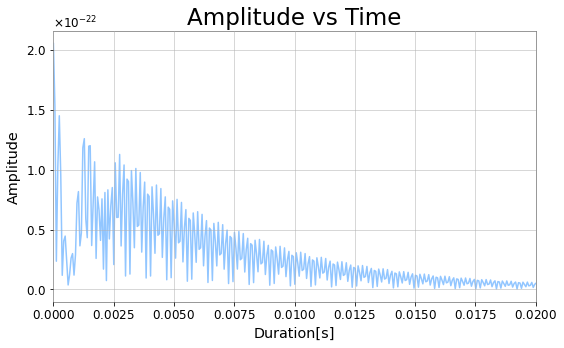

In [23]:
#if you want to just plot a single amplitude vs time graph

plt.rcParams["figure.figsize"] = (8,5)
plt.plot(series.times, np.abs(hp))
plt.title("Amplitude vs Time", fontsize=23 )
plt.xlabel("Duration[s]")
plt.ylabel("Amplitude")
plt.xlim(.0, 0.02)
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/Colab_Notebooks/GW170817/ampp9.png')